In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_squared_error





In [52]:
def load_dataset():
    csv_path = "/kaggle/input/insurance-data/insurance.csv"
    return pd.read_csv(csv_path)

In [53]:
insurance = load_dataset()

**Performing EDA**

In [54]:
insurance.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [55]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**analysing columns** 

In [57]:
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [58]:
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [59]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [60]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Splitting data into Training and Testing set**

In [61]:
train_set, test_set = train_test_split(insurance, test_size=0.2,random_state=42)

In [62]:
train_set.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


**Visualizing Dataset**

In [63]:
corr_mat = train_set.corr(numeric_only=True)
corr_mat

,age,bmi,children,charges
age,1.000000,0.118274,0.060999,0.281721
bmi,0.118274,1.000000,-0.005040,0.197316
children,0.060999,-0.005040,1.000000,0.071885
charges,0.281721,0.197316,0.071885,1.000000


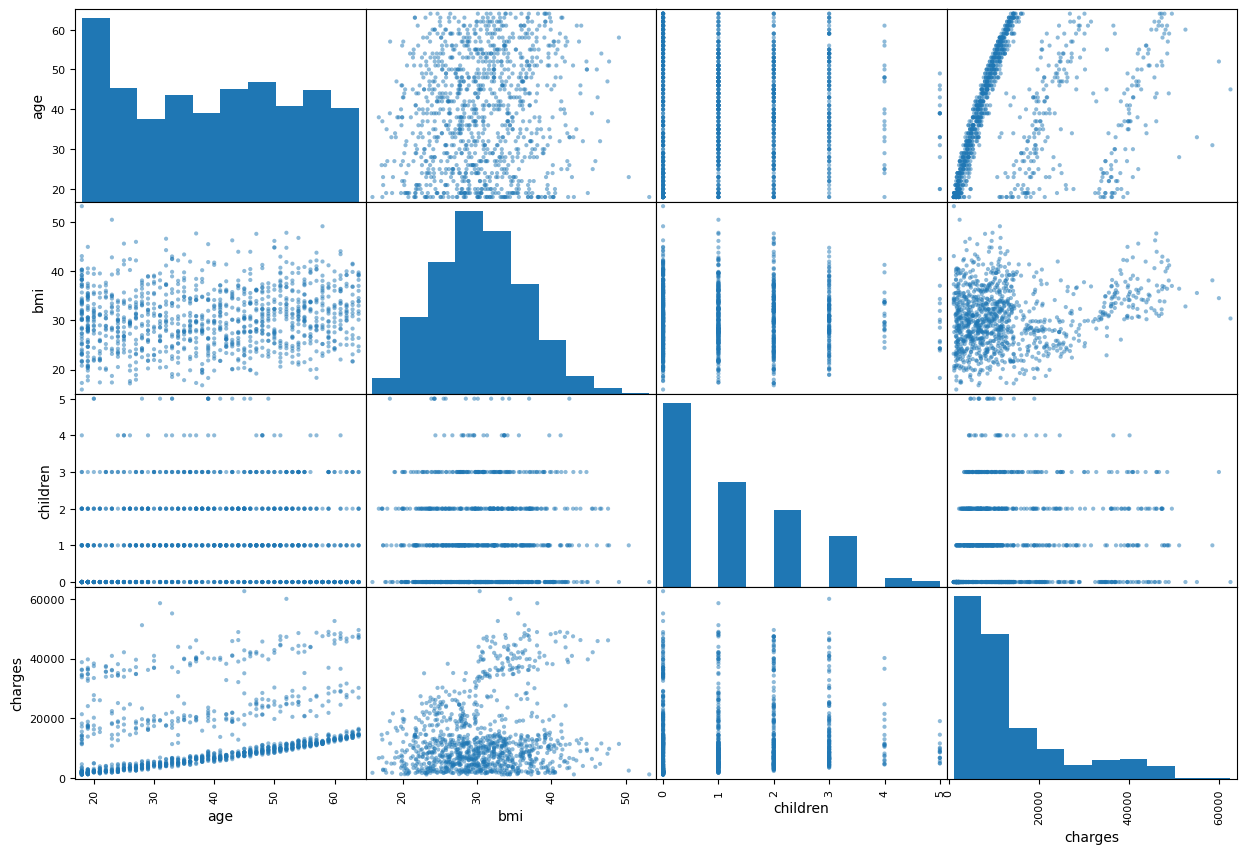

In [64]:
scatter_matrix(train_set, figsize=(15,10))
plt.show()

From the above plots we can see that there is some relationship between charges and age as they have 3 linear graphs and a positive correlation 

In [65]:
train_set_1 = train_set.copy()

In [66]:
train_set_1.replace(
    {
        "smoker": {
            "yes" : 1,
            "no" : 0
        }
    }, inplace=True)

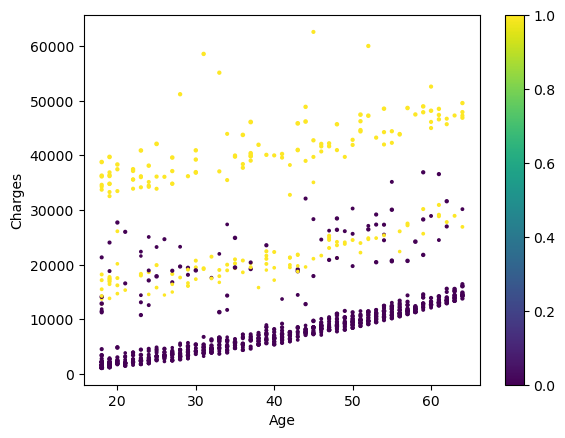

In [67]:
# plot between age and charges ,bmi is the size of the plot and smoker/non-smoker as the color of the points 

sc= plt.scatter(x=train_set_1["age"], y=train_set_1["charges"],s=train_set_1["bmi"]/8, c=train_set_1["smoker"])
plt.colorbar(sc)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


There is some relation with smoking as we can see that below 10,000 charges all are non-smokers and above 30,000 charges all are smokers

In [68]:
train_set_1.replace(
{
    "sex":{
        "female": 0,
        "male": 1
    }
},inplace= True)

<function matplotlib.pyplot.show(close=None, block=None)>

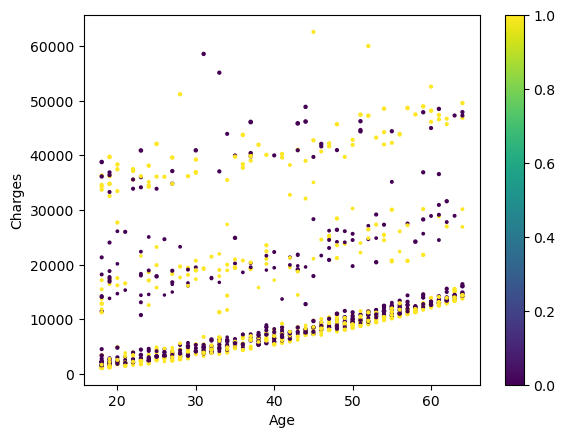

In [69]:
# plot between age and charges ,bmi is the size of the plot and female/male as the color of the points 
sc = plt.scatter(x= train_set_1["age"], y= train_set_1["charges"], s= train_set_1["bmi"]/8 ,c = train_set_1["sex"])
plt.colorbar(sc)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show

There is no clear relation between sex and charge as we can see the distribution is random 

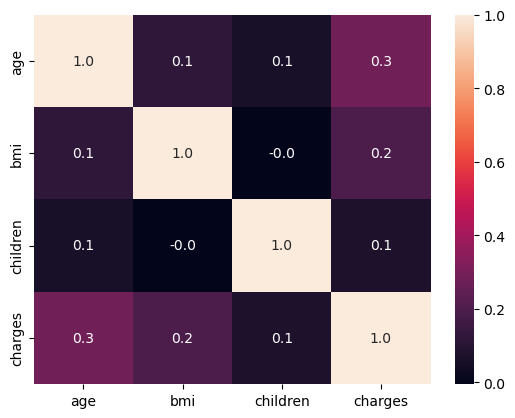

In [70]:
sns.heatmap(corr_mat, annot=True, fmt=".1f")
plt.show()

**The target variable is "charges". So, lets correlate other columns with "charges"**

In [71]:
corr_mat["charges"]

age         0.281721
bmi         0.197316
children    0.071885
charges     1.000000
Name: charges, dtype: float64

**Combining attributes to increase the no of features**

In [72]:
train_set_2 = train_set.copy()
train_set_2

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.950,2,no,northwest,9193.83850
1285,47,female,24.320,0,no,northeast,8534.67180
1142,52,female,24.860,0,no,southeast,27117.99378
969,39,female,34.320,5,no,southeast,8596.82780
486,54,female,21.470,3,no,northwest,12475.35130
...,...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast,4561.18850
1130,39,female,23.870,5,no,southeast,8582.30230
1294,58,male,25.175,0,no,northeast,11931.12525
860,37,female,47.600,2,yes,southwest,46113.51100


**creating an age group column** 

In [73]:
age_bins = [0,18,30,45,60,99]
age_label = ["0-18" , "18-30", "30-45", "45-60", "60+"]
train_set_2["age-group"] = pd.cut(train_set["age"], bins=age_bins, labels=age_label, right=False)


**Dividing bmi into four categories**

In [74]:
bmi_bins =[0,18.5,24.9,29.9,float('inf')]
bmi_labels = ["underweight","normal weight","overweight","obese"]
train_set_2["bmi_group"]=pd.cut(train_set_2["bmi"],bins=bmi_bins,labels=bmi_labels,right=False)

In [75]:
train_set_2

,age,sex,bmi,children,smoker,region,charges,age-group,bmi_group
560,46,female,19.950,2,no,northwest,9193.83850,45-60,normal weight
1285,47,female,24.320,0,no,northeast,8534.67180,45-60,normal weight
1142,52,female,24.860,0,no,southeast,27117.99378,45-60,normal weight
969,39,female,34.320,5,no,southeast,8596.82780,30-45,obese
486,54,female,21.470,3,no,northwest,12475.35130,45-60,normal weight
...,...,...,...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast,4561.18850,18-30,obese
1130,39,female,23.870,5,no,southeast,8582.30230,30-45,normal weight
1294,58,male,25.175,0,no,northeast,11931.12525,45-60,overweight
860,37,female,47.600,2,yes,southwest,46113.51100,30-45,obese


**Calculating charges / bmi ratio**

In [76]:
train_set_2["charges_bmi_ratio"]= np.round(train_set_2["charges"]/ train_set_2["bmi"])

**Calculating avg charges per region**

In [77]:
avg_charges_per_region = train_set_2.groupby('region')["charges"].mean(numeric_only=True)
avg_charges_per_region

region
northeast    13333.008791
northwest    12622.514246
southeast    14698.242993
southwest    12611.500973
Name: charges, dtype: float64

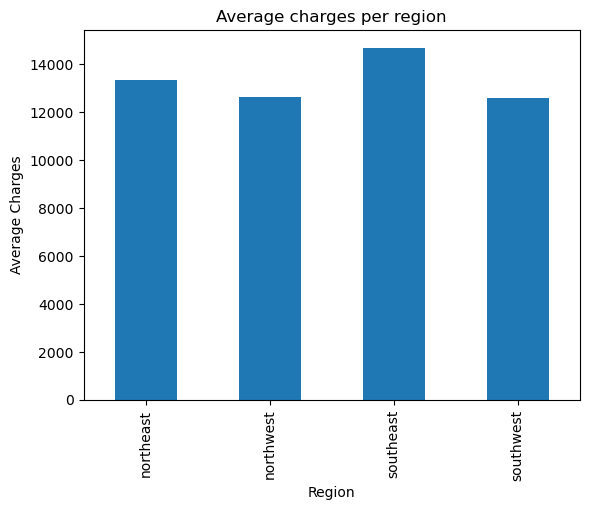

In [78]:
avg_charges_per_region.plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.title("Average charges per region")
plt.show()

There are similar average charges

**Calculating Average charges per age group**

In [79]:
avg_charges_per_agegroup= train_set_2.groupby("age-group")["charges"].mean(numeric_only=True)
avg_charges_per_agegroup

age-group
0-18              NaN
18-30     9629.401450
30-45    12235.307970
45-60    15902.453549
60+      21142.598469
Name: charges, dtype: float64

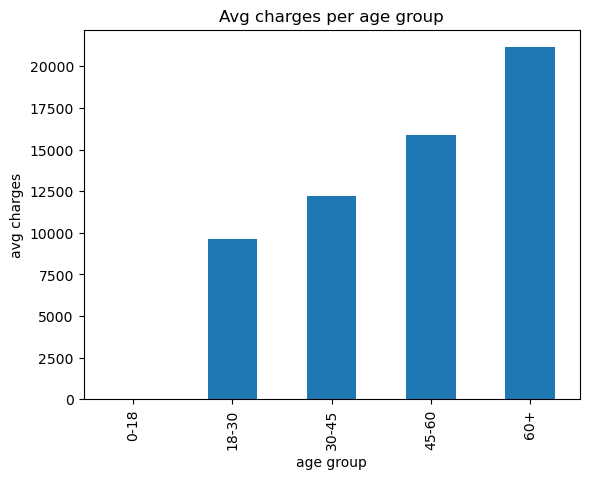

In [80]:
avg_charges_per_agegroup.plot(kind="bar")
plt.xlabel("age group")
plt.ylabel("avg charges")
plt.title("Avg charges per age group")
plt.show()

60+ age group has the highest average charges which means they are more  likely to have higher medical charges

**Calculating  Average charges per bmi-group**

In [81]:
avg_charges_per_bmi_group = train_set_2.groupby("bmi_group")["charges"].mean(numeric_only=True)
avg_charges_per_bmi_group

bmi_group
underweight       7919.140650
normal weight    10463.332069
overweight       10958.000546
obese            15698.314983
Name: charges, dtype: float64

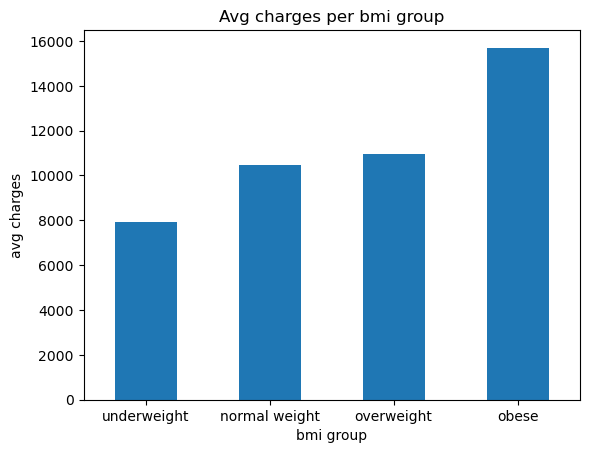

In [82]:
avg_charges_per_bmi_group.plot(kind="bar")
plt.xlabel("bmi group")
plt.xticks(rotation=0) # this for for x-axis labels
plt.ylabel("avg charges")
plt.title("Avg charges per bmi group")
plt.show()

Obese people have higher average charges


**Preaparing Data for Model**

In [83]:
train_set_3 = train_set_2.copy()
train_set_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                1070 non-null   int64   
 1   sex                1070 non-null   object  
 2   bmi                1070 non-null   float64 
 3   children           1070 non-null   int64   
 4   smoker             1070 non-null   object  
 5   region             1070 non-null   object  
 6   charges            1070 non-null   float64 
 7   age-group          1070 non-null   category
 8   bmi_group          1070 non-null   category
 9   charges_bmi_ratio  1070 non-null   float64 
dtypes: category(2), float64(3), int64(2), object(3)
memory usage: 77.7+ KB


**Casting the "category" column to "object" datatype**

In [84]:
train_set_3 = train_set_3.astype({
    "age-group": "object",
    "bmi_group": "object"
})

In [85]:
train_set_3.dtypes

age                    int64
sex                   object
bmi                  float64
children               int64
smoker                object
region                object
charges              float64
age-group             object
bmi_group             object
charges_bmi_ratio    float64
dtype: object

**Separating target and features**

In [86]:
train_set_4 = train_set_3.copy()

In [87]:
insurance_features = train_set_4.drop("charges",axis =1 )
insurance_labels = train_set_4["charges"].copy()

In [88]:
insurance_features.head()

,age,sex,bmi,children,smoker,region,age-group,bmi_group,charges_bmi_ratio
560,46,female,19.95,2,no,northwest,45-60,normal weight,461.0
1285,47,female,24.32,0,no,northeast,45-60,normal weight,351.0
1142,52,female,24.86,0,no,southeast,45-60,normal weight,1091.0
969,39,female,34.32,5,no,southeast,30-45,obese,250.0
486,54,female,21.47,3,no,northwest,45-60,normal weight,581.0


In [89]:
insurance_labels

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

**Handling categorical data**

In [92]:
insurance_features_1 = insurance_features.copy()

In [93]:
insurance_features_1.select_dtypes("object")

,sex,smoker,region,age-group,bmi_group
560,female,no,northwest,45-60,normal weight
1285,female,no,northeast,45-60,normal weight
1142,female,no,southeast,45-60,normal weight
969,female,no,southeast,30-45,obese
486,female,no,northwest,45-60,normal weight
...,...,...,...,...,...
1095,female,no,northeast,18-30,obese
1130,female,no,southeast,30-45,normal weight
1294,male,no,northeast,45-60,overweight
860,female,yes,southwest,30-45,obese


**Model Training**

In [94]:
class LinearRegression:
    def _init_(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zero(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X.T, self.weights) + self.bias

            dw = (1/n_samples)* np.dot(X, (y_pred - y))
            db = (1 / n_samples) * np.dot(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [ ]:
from LinearRegression import LinearRegression


X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color = "b", marker ="o", s=30)
plt.show()

reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test,predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test,predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('virdis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()
